<a href="https://colab.research.google.com/github/PranavReddyy/Labs-IIITH/blob/main/%5B13%5D_AIML_Module_04_Lab_01_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [99]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [100]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [101]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [102]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

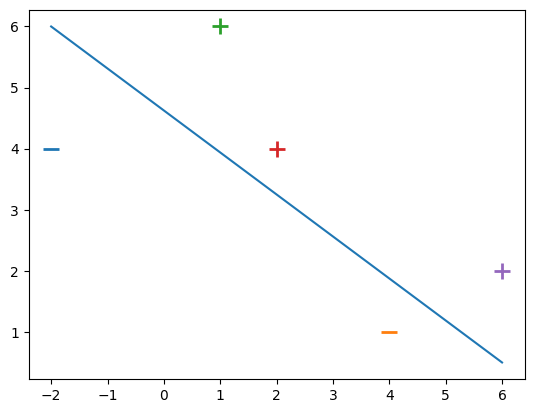

In [103]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

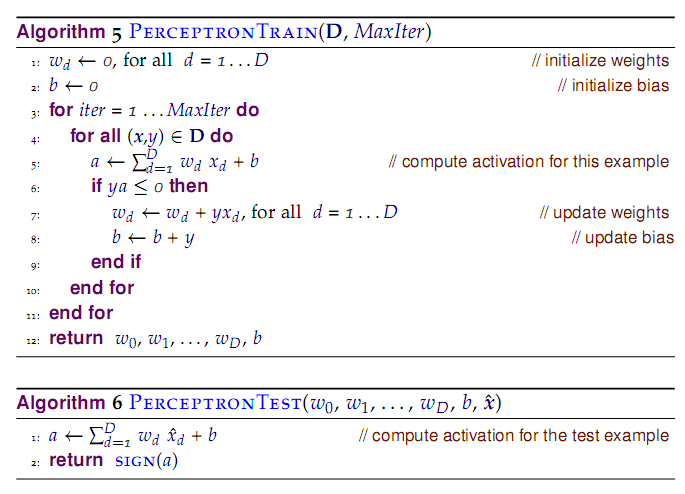

The algorithm is shown in the above image.

In [104]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [105]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

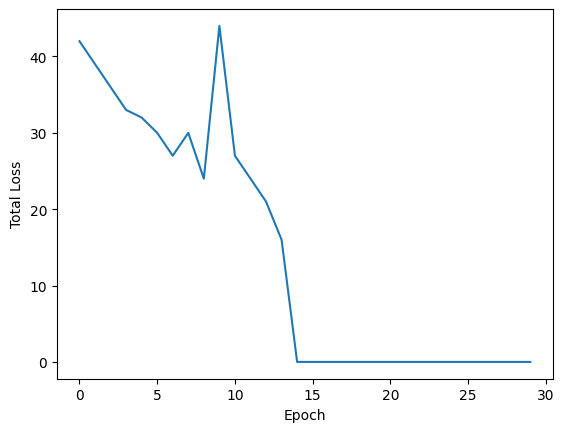

In [106]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

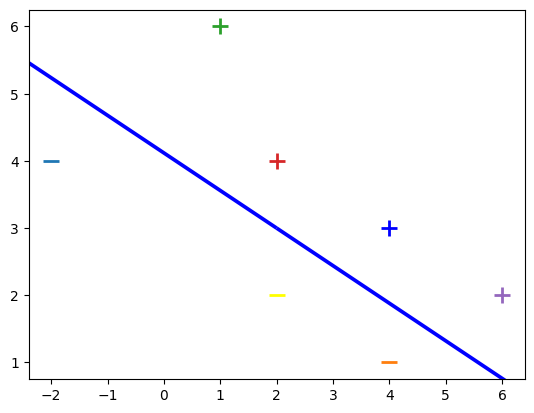

In [107]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.


In [108]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [109]:
# Load the Banknote dataset
data = fetch_openml(name="banknote-authentication", version=1)

# Features and labels
X = data.data
y = data.target

# Encode labels: convert to -1 and 1
le = LabelEncoder()
y = le.fit_transform(y)  # Converts to 0 and 1
y = 2 * y - 1  # Converts 0->-1 and 1->1

# Add bias term (-1) to the features
X = np.hstack((X, -1 * np.ones((X.shape[0], 1))))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

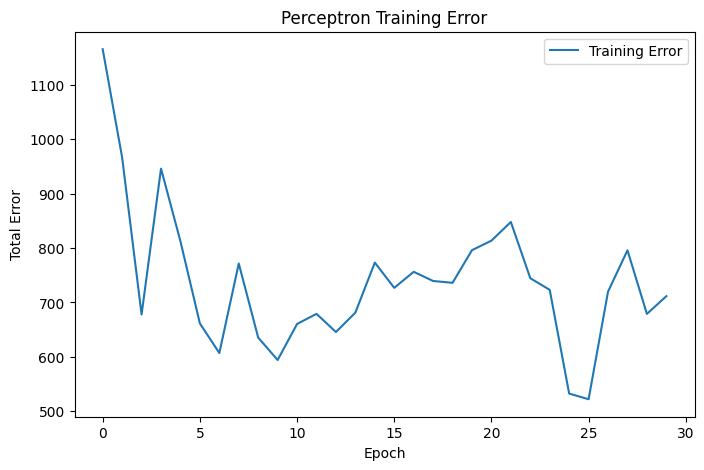

In [110]:
# Define the perceptron training function
def perceptron_train(X, Y, epochs=30, eta=1):
    """
    Trains the perceptron and returns the weights and the error per epoch.

    :param X: Feature matrix with bias term
    :param Y: Labels (-1 or 1)
    :param epochs: Number of epochs
    :param eta: Learning rate
    :return: Weight vector, list of total errors per epoch
    """
    w = np.zeros(X.shape[1])  # Initialize weights
    errors = []  # To track total errors per epoch

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w += eta * X[i] * Y[i]  # Update weights
        errors.append(-total_error)  # Append negative total error for visualization

    return w, errors

# Train the perceptron
w, errors = perceptron_train(X_train, y_train)

# Plot the error over epochs
plt.figure(figsize=(8, 5))
plt.plot(errors, label="Training Error")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.title("Perceptron Training Error")
plt.legend()
plt.show()

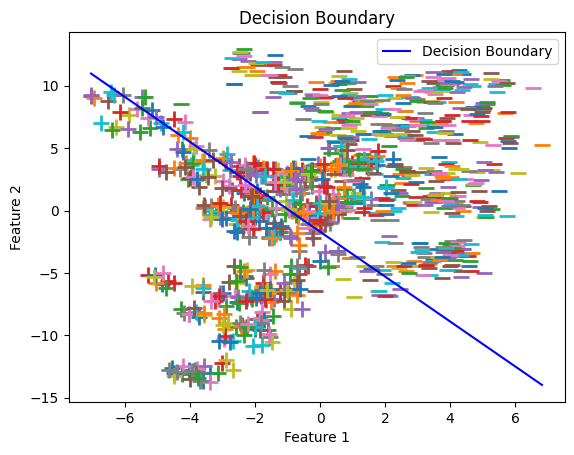

In [111]:
def plot_decision_boundary(X, y, w):
    """
    Plots the decision boundary and the samples.

    :param X: Feature matrix (only the first two features are used for visualization)
    :param y: Labels (-1 or 1)
    :param w: Trained weight vector
    """
    for d, sample in enumerate(X):
        # Plot negative samples
        if y[d] == -1:
            plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
        # Plot positive samples
        else:
            plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

    # Decision boundary
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = -(w[0] * x_min + w[-1]) / w[1], -(w[0] * x_max + w[-1]) / w[1]
    plt.plot([x_min, x_max], [y_min, y_max], 'b-', label="Decision Boundary")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.legend()
    plt.show()

# Visualize the decision boundary using the first two features
plot_decision_boundary(X_train[:, :2], y_train, w)


2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

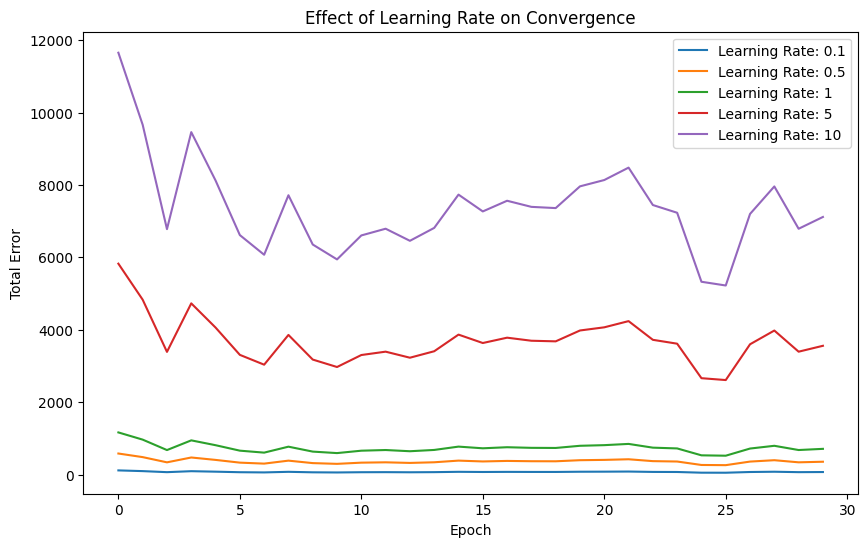

In [112]:
def perceptron_train_lr(X, Y, epochs=30, eta=1):
    """
    Trains the perceptron for a given learning rate and returns the weights and error per epoch.

    :param X: Feature matrix with bias term
    :param Y: Labels (-1 or 1)
    :param epochs: Number of epochs
    :param eta: Learning rate
    :return: Weight vector, list of total errors per epoch
    """
    w = np.zeros(X.shape[1])  # Initialize weights
    errors = []  # To track total errors per epoch

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w += eta * X[i] * Y[i]  # Update weights with learning rate
        errors.append(-total_error)  # Append negative total error for visualization

    return w, errors

# Test different learning rates
learning_rates = [0.1, 0.5, 1, 5, 10]  # Define a range of learning rates
epochs = 30

plt.figure(figsize=(10, 6))
for eta in learning_rates:
    _, errors = perceptron_train_lr(X_train, y_train, epochs=epochs, eta=eta)
    plt.plot(errors, label=f"Learning Rate: {eta}")

plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.show()

- Small Learning Rates (e.g., 0.1): Convergence is slow, requiring more epochs to reduce the error.
- Moderate Learning Rates (e.g., 1): Convergence happens faster and error reduces smoothly.
- Large Learning Rates (e.g., 10): The algorithm may overshoot the optimal boundary, causing oscillations or failure to converge.

3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.


In [113]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [114]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


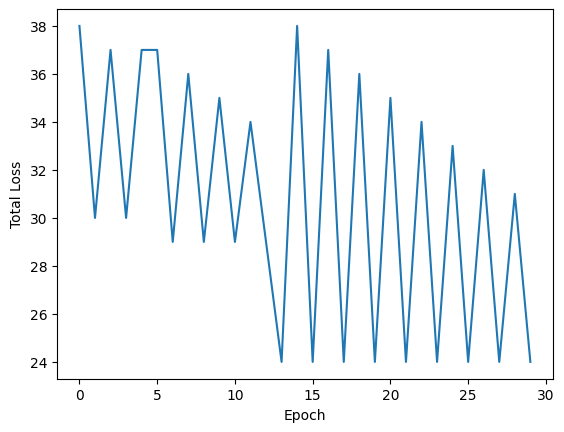

In [115]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

In [116]:
X = np.array([
    [-2, 8, -1],
    [8, 10, -1],
    [10, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, -1, -1])

[ 0. -6. 26.]


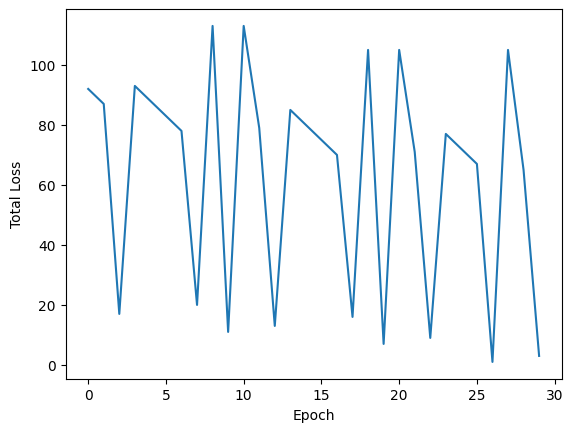

In [117]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.



Analysis of Perceptron Learning for the AND Dataset

i) Is the Dataset Learnable by the Perceptron?

The dataset corresponds to the Boolean "AND" function, defined as:
- ( x_1, x_2 in {0, 1} )
- \( y = +1 \) (True) if \( x_1 \land x_2 = 1 \), otherwise \( y = -1 \) (False).

The "AND" function is **linearly separable** since there exists a hyperplane (a line in 2D) that separates the positive and negative classes. Therefore, **this dataset is learnable by a Perceptron**.

ii) Weights Update Procedure for Each Iteration

The Perceptron learning algorithm uses the following update rule:
1. **Initialization:** Start with weights \( w = [0, 0] \) and bias \( b = 0 \).
2. **Prediction:** Compute \( y_{\text{pred}} = \text{sign}(w \cdot x + b) \).
3. **Update Rule:** For a misclassified point (\( y_{\text{pred}} \neq y \)), update weights and bias:
   \[
   w \leftarrow w + \eta \cdot y \cdot x
   \]
   \[
   b \leftarrow b + \eta \cdot y
   \]
   Here, \( \eta \) is the learning rate (set to 1 for simplicity).
4. Repeat the process for a fixed number of epochs or until convergence.

Code Implementation \
Below is the Python implementation for training a Perceptron on the "AND" dataset:

In [118]:
# AND dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([-1, -1, -1, 1])  # Labels for AND function (True: +1, False: -1)

def perceptron_train(X, Y, epochs=10):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])  # Two weights for x1, x2
    b = 0  # Bias
    eta = 1  # Learning rate

    # Training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}")
        for i in range(len(X)):
            # Predict the output
            y_pred = np.sign(np.dot(w, X[i]) + b)
            # Update weights and bias if misclassified
            if Y[i] != y_pred:
                w += eta * Y[i] * X[i]
                b += eta * Y[i]
                print(f"Update: w = {w}, b = {b}")

    return w, b

# Train the perceptron on the AND dataset
weights, bias = perceptron_train(X, Y)
print(f"Final weights: {weights}, Final bias: {bias}")

Epoch 1
Update: w = [0. 0.], b = -1
Update: w = [1. 1.], b = 0
Epoch 2
Update: w = [1. 1.], b = -1
Update: w = [1. 0.], b = -2
Update: w = [2. 1.], b = -1
Epoch 3
Update: w = [2. 0.], b = -2
Update: w = [1. 0.], b = -3
Update: w = [2. 1.], b = -2
Epoch 4
Update: w = [1. 1.], b = -3
Update: w = [2. 2.], b = -2
Epoch 5
Update: w = [2. 1.], b = -3
Update: w = [3. 2.], b = -2
Epoch 6
Update: w = [3. 1.], b = -3
Update: w = [2. 1.], b = -4
Update: w = [3. 2.], b = -3
Epoch 7
Update: w = [2. 2.], b = -4
Update: w = [3. 3.], b = -3
Epoch 8
Update: w = [3. 2.], b = -4
Epoch 9
Epoch 10
Final weights: [3. 2.], Final bias: -4



2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

## Analysis of Learnable Boolean Functions by a Perceptron

- Total Boolean Functions for 2-Bit Binary Input

  - For a 2-bit binary input (x_1, x_2), there are (2^2 = 4) possible input combinations:
  
    (x_1, x_2) in {(0, 0), (0, 1), (1, 0), (1, 1)}
  
  - A Boolean function maps these inputs to one of two possible outputs (y in {-1, +1}):

      - Output Space: { y_1, y_2, y_3, y_4 }, \
        where y_i in { -1, +1 }.

  - Since each input combination can independently take either \(-1\) or \(+1\), there are \(2^4 = 16\) possible distinct Boolean functions.

**i) How Many of These Boolean Functions Are Learnable by a Perceptron?**

A Boolean function is **learnable by a Perceptron** if it is **linearly separable**, meaning there exists a linear boundary that divides the positive (+1) and negative (-1) classes in the input space.

1. **Visualizing Input Space:**
   The 4 input combinations correspond to points in a 2D space:
   
   (0, 0), (0, 1), (1, 0), (1, 1).
   

2. **Linearly Separable Functions:**
   - A Perceptron can learn functions where a single straight line can separate the \(-1\) and \(+1\) outputs.
   - Examples include:
     - AND
     - OR
     - NAND
     - NOR

3. **Non-Linearly Separable Functions:**
   - Functions requiring more than one linear boundary are **not learnable** by a Perceptron.
   - Examples include:
     - XOR
     - XNOR

Total Learnable Functions
Out of 16 possible Boolean functions:
- **Linearly separable (learnable):** 14 functions.
- **Non-linearly separable (not learnable):** 2 functions (XOR, XNOR).

**ii) Truth Tables for Non-Learnable Functions**

### XOR
| \(x_1\) | \(x_2\) | \(y\) (XOR) |
|--------|--------|-------------|
| 0      | 0      | -1          |
| 0      | 1      | +1          |
| 1      | 0      | +1          |
| 1      | 1      | -1          |

### XNOR
| \(x_1\) | \(x_2\) | \(y\) (XNOR) |
|--------|--------|--------------|
| 0      | 0      | +1           |
| 0      | 1      | -1           |
| 1      | 0      | -1           |
| 1      | 1      | +1           |

Explanation of Non-Learnability

The XOR and XNOR functions are not linearly separable because:
- Their output cannot be divided by a single straight line in the input space.
- XOR requires two separate regions for \(+1\) and \(-1\), which a Perceptron cannot achieve.

Code to Verify Linearity \
The following code checks whether a given Boolean function is linearly separable:

In [119]:
from itertools import product

def is_linearly_separable(X, Y):
    # Add bias term (-1) to X
    X = np.hstack((X, -1 * np.ones((X.shape[0], 1))))
    w = np.zeros(X.shape[1])  # Initialize weights
    eta = 1  # Learning rate
    epochs = 10

    for epoch in range(epochs):
        error = False
        for i in range(len(X)):
            y_pred = np.sign(np.dot(w, X[i]))
            if Y[i] != y_pred:  # Misclassified point
                w += eta * Y[i] * X[i]
                error = True
        if not error:
            return True  # Linearly separable
    return False  # Not linearly separable

# Define input combinations
X = np.array(list(product([0, 1], repeat=2)))

# Test all 16 Boolean functions
all_outputs = list(product([-1, 1], repeat=4))
learnable = []
non_learnable = []

for Y in all_outputs:
    if is_linearly_separable(X, np.array(Y)):
        learnable.append(Y)
    else:
        non_learnable.append(Y)

print(f"Learnable functions: {len(learnable)}")
print(f"Non-learnable functions: {len(non_learnable)}")
print(f"Non-learnable truth tables: {non_learnable}")

Learnable functions: 14
Non-learnable functions: 2
Non-learnable truth tables: [(-1, 1, 1, -1), (1, -1, -1, 1)]
